# Weather Changes Over Time (Consuming APIs)

## Task
Utilize the following two APIs to evaluate the changes in temperature for your birthday and city you were born in:
* [geocode.xyz](geocode.xyz)
* [open-meteo.com](open-meteo.com)


In [1]:
from datetime import date, datetime, timedelta

import requests
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter

%matplotlib inline

sns.set_palette('muted')
sns.set_style('white')

## Question 1: Geocoding A Location
Write a function that utilizes the [geocode.xyz](geocode.xyz) API to take in a city and country and return the latitude and longitude of that location

```
def geocode_location(city, country):
    # your code
    return latitude, longitude
```

For example:
```
geocode_location("london", "united kingdom")
```
should return
```
(-0.11534, 51.49742)
```

In [2]:
# write your solution here
def geocode_location(city, country):
    url = f'https://geocode.xyz/{city}%20{country}'
    r = requests.get(url, params={'json': 1}).json()
    return float(r['latt']), float(r['longt'])

# geocode_location('london', 'united kingdom')


## Question 2: Determining Weather Using Date and Location
Write a function that utilizes the [open-meteo.com](https://open-meteo.com/) API to take in a date and location and return the 15-day average high and low for the following measurements from the years 1960 to 2022:
* `precipitation_sum` (mm): Sum of daily precipitation (including rain, showers and snowfall)
* `temperature_2m_max` (°F): Maximum daily air temperature at 2 meters above ground
* `temperature_2m_min` (°F): Minimum daily air temperature at 2 meters above ground
* `apparent_temperature_max` (°F): Maximum daily apparent temperature
* `apparent_temperature_min` (°F): Min daily apparent temperature

The function should return the above measurements in a dictionary object with the keys being `"precipitation_sum"`, `"temperature_2m_max"`, etc. and the values being the 15-day average of the measurements. The 15-day average should be the 7 days preceeding the input date, the input date, and the 7 days following the input date. This will give the results more statistical validity by increasing the number of samples for each measurement.

The `get_historical_weather_measurements()` function will include a few different sub-tasks:

### Create API Request in Postman/Insomnia
Use the following [API Documentation](https://open-meteo.com/en/docs/historical-weather-api#api-documentation) page to create an API request that responds with a JSON object of the measurements listed above. Make sure the response object meets the following:
* Temperatue measurements are in Fahrenheit
* Precipitation measurements are in inches
* Measurements are daily aggregations
* 15 day range of weather
* JSON format


Before writing any code, use Postman/Insomnia to create the API request and take a screenshot of the request/response.

### Create API Request Function
Convert the request above into a function. The function should take in `latitude`, `longitude`, and `date` as its arguments and return the API response, if successful.

```
def get_api_response(latitude, longitude, date):
    # your code

```

Use the helper function below for creating a 15-day date range 

In [3]:
# helper function for 15-day date range
def get_date_range(birthday):
    # print("Date-Range Birthday", type(birthday))
    birthday = datetime.strptime(birthday, '%Y-%m-%d')
    return {'start_date': birthday - timedelta(days=7),
            'end_date': birthday + timedelta(days=7)
           }



In [4]:
# write your solution here
def get_api_response(latitude, longitude, date):
    url_slug = 'https://archive-api.open-meteo.com/v1/archive'
    date_range = get_date_range(date)
    # print('date range', date_range)
    start_date = datetime.strftime(get_date_range(date)['start_date'], '%Y-%m-%d')
    # print('Start Date', start_date)
    end_date = datetime.strftime(get_date_range(date)['end_date'], '%Y-%m-%d')
    #api call
    response = requests.get(url_slug, 
                            params={'latitude': latitude,
                                   'longitude': longitude,
                                   'start_date': start_date,
                                   'end_date': end_date,
                                   'daily': ['temperature_2m_max', 'temperature_2m_min', 'apparent_temperature_max', 'apparent_temperature_min', 'precipitation_sum'],
                                   'timezone': 'auto',
                                   'temperature_unit': 'fahrenheit',
                                   'precipitation_unit': 'inch'}).json()
    return response

# get_api_response(geocode_location('london', 'united kingdom')[0], geocode_location('london', 'united kingdom')[1], get_date_range('02/23/1995')) 
# get_api_response(geocode_location('london', 'united kingdom')[0], geocode_location('london', 'united kingdom')[1], get_date_range('06/02/2023'))
# birthday = date(1995,2,23)
# latitude, longitude = geocode_location('london', 'united kingdom')
# get_api_response(latitude, longitude, birthday)

### Iterating Over Each Year
Write a function that iterates through each year between 1960 and 2022 and returns the corresponding JSON response objects containing weather data for each year in a python list.

```
def get_all_response_objects(start_year, end_year):
    # your code
```


In [5]:
# write your solution here
# def get_all_response_objects(latitude, longitude, date):
# def get_all_response_objects(start_year, end_year):
#     responses = []
#     for year in range(start_year, end_year):
#         request_date = date(year, birthday.month, birthday.day)
#         r = get_api_response(latitude, longitude, request_date)
#         responses.append(r)
#     return responses

# get_all_response_objects(1960, 1962, 'london', 'united kingdom', date(1995, 2, 23))

def get_all_response_objects(latitude, longitude, date):
    responses = []
    start_year = 1960
    end_year = 2022
    
    for year in range (start_year, end_year):
        request_date = (year, date.month, date.day)
        # print(request_date)
        # print(type(request_date))
        request_date = datetime(request_date[0], request_date[1], request_date[2])
        formatted_date = datetime.strftime(request_date, '%Y-%m-%d')
        
        # print('Request', request_date)
        # print('Formatted', formatted_date)
        r = get_api_response(latitude, longitude, formatted_date)
        responses.append(r)
    return responses

# latitude = geocode_location('london', 'united kingdom')[1]
# longitude = geocode_location('london', 'united kingdom')[0]




### Parse JSON Responses & Aggregate Data
Write a function that takes the list of JSON response objects from the previous function in as a parameter and returns a pandas DataFrame containing the original input date, the measurements, and the average across the 15 days.
```
def parse_json_response(responses):
    # your code
```


In [6]:
# write your solution here
def parse_json_response(responses):
    # print('JSON Response Function')
    
    return pd.DataFrame(responses)
     # remove this line once you start adding code to your function

### Combining the Functions
Write a function that combines all the above functions into one, where the user inputs their birthday and location and the function returns the pandas DataFrame containing the summary of measurements.

```
def get_data():
    birthday = get_user_birthday()
    location = get_user_city_of_birth()
    # your code here
```

The helper functions below can be used for birthday and location input information:

In [7]:
# helper functions
def get_user_birthday():
    birthday = input('Enter your birthday (MM/DD/YYYY): ')
    return datetime.strptime(birthday, "%m/%d/%Y")


def get_user_city_of_birth():
    city = input('Enter the city you were born in: ')
    country = input('Enter the country you were born in: ')
    return city , country


In [8]:
# write your solution here
def get_data():
    
    birthday = get_user_birthday()
    location = get_user_city_of_birth()
    latitude, longitude = geocode_location(*location)
    all_responses = get_all_response_objects(latitude, longitude, birthday)
    
    
    return parse_json_response(all_responses) # remove this line once you start adding code to your function

Run your function and set it equal to `df`:

In [10]:
df = get_data()

df.head()

Enter your birthday (MM/DD/YYYY):  02/23/1995
Enter the city you were born in:  Detroit
Enter the country you were born in:  USA


,latitude,longitude,generationtime_ms,utc_offset_seconds,timezone,timezone_abbreviation,elevation,daily_units,daily
0,42.40001,-83.1,62.293053,-14400,America/Detroit,EDT,199.0,"{'time': 'iso8601', 'temperature_2m_max': '°F'...","{'time': ['1960-02-16', '1960-02-17', '1960-02..."
1,42.40001,-83.1,102.529049,-14400,America/Detroit,EDT,199.0,"{'time': 'iso8601', 'temperature_2m_max': '°F'...","{'time': ['1961-02-16', '1961-02-17', '1961-02..."
2,42.40001,-83.1,129.034042,-14400,America/Detroit,EDT,199.0,"{'time': 'iso8601', 'temperature_2m_max': '°F'...","{'time': ['1962-02-16', '1962-02-17', '1962-02..."
3,42.40001,-83.1,98.762989,-14400,America/Detroit,EDT,199.0,"{'time': 'iso8601', 'temperature_2m_max': '°F'...","{'time': ['1963-02-16', '1963-02-17', '1963-02..."
4,42.40001,-83.1,98.317981,-14400,America/Detroit,EDT,199.0,"{'time': 'iso8601', 'temperature_2m_max': '°F'...","{'time': ['1964-02-16', '1964-02-17', '1964-02..."


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   latitude               62 non-null     float64
 1   longitude              62 non-null     float64
 2   generationtime_ms      62 non-null     float64
 3   utc_offset_seconds     62 non-null     int64  
 4   timezone               62 non-null     object 
 5   timezone_abbreviation  62 non-null     object 
 6   elevation              62 non-null     float64
 7   daily_units            62 non-null     object 
 8   daily                  62 non-null     object 
dtypes: float64(4), int64(1), object(4)
memory usage: 4.5+ KB


## Question 3: Visualizing The Data
Plot the DataFrame using `matplotlib`/`seaborn` and write a short summary of your results.

In [12]:
# enter your code here
#creating new dataframe desired information

######debug code##########
# print(len(df[['daily'][0]]))
# df[['daily'][0]]
# print(df[['daily'][0]][0])

# type(df[['daily'][0]][0])
##end debug code##

#create list of dataframes, then merge into one


df_list = []
for n in range(0, len(df[['daily'][0]])):
    # df_list = []
    new_df = pd.DataFrame(df[['daily'][0]][n])
    df_list.append(new_df)

# print('DF List', df_list)
# new_df = pd.DataFrame(df[['daily'][0]][1])
# new_df


new_df = pd.concat(df_list)
new_df




,time,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,precipitation_sum
0,1960-02-16,39.8,29.2,30.6,20.2,0.000
1,1960-02-17,39.5,30.3,31.0,21.4,0.016
2,1960-02-18,33.2,25.3,23.6,17.4,0.000
3,1960-02-19,30.1,19.6,16.5,7.5,0.000
4,1960-02-20,31.8,15.7,22.4,3.8,0.000
...,...,...,...,...,...,...
10,2021-02-26,36.8,19.8,29.1,10.8,0.000
11,2021-02-27,46.2,29.4,39.1,22.8,0.193
12,2021-02-28,51.9,26.5,47.4,19.3,0.008
13,2021-03-01,41.0,22.0,31.3,10.3,0.000


### Results Summary:

In [13]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 930 entries, 0 to 14
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      930 non-null    object 
 1   temperature_2m_max        930 non-null    float64
 2   temperature_2m_min        930 non-null    float64
 3   apparent_temperature_max  930 non-null    float64
 4   apparent_temperature_min  930 non-null    float64
 5   precipitation_sum         930 non-null    float64
dtypes: float64(5), object(1)
memory usage: 50.9+ KB


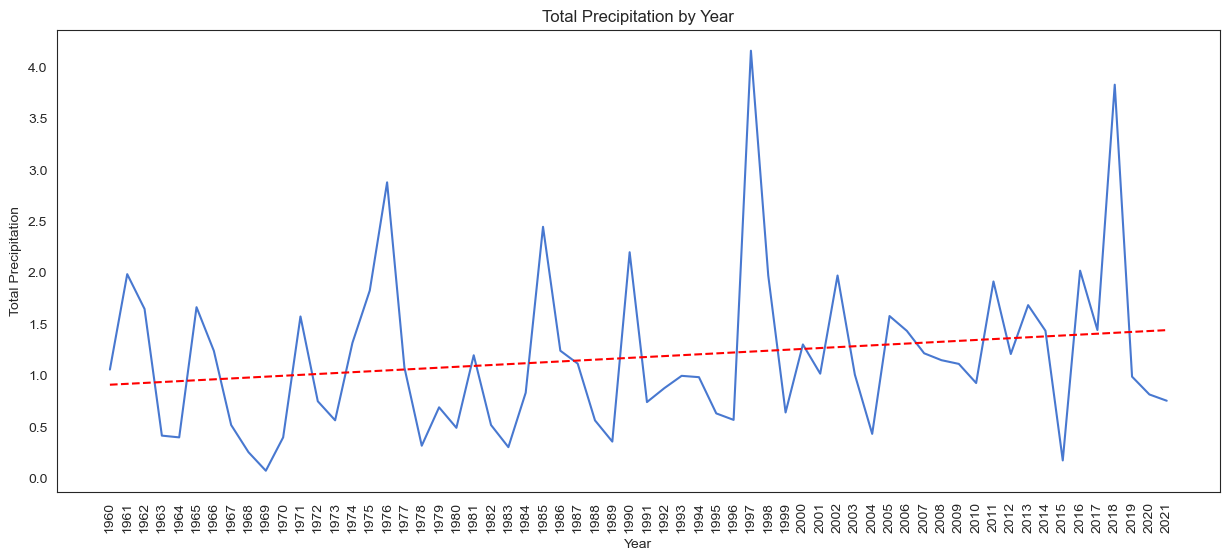

In [21]:
new_df['time'] = pd.to_datetime(new_df['time'])

# Extract the year from the 'time' column
new_df['year'] = new_df['time'].dt.year

# Group by year and calculate the sum of precipitation
grouped_data = new_df.groupby('year')['precipitation_sum'].sum()

plt.figure(figsize=(15,6))

# Create a line plot
plt.plot(grouped_data.index, grouped_data.values)

#adding trendline for clarity
trendline_coeffs = np.polyfit(grouped_data.index, grouped_data.values, 1)
trendline = np.poly1d(trendline_coeffs)

# Plot the trendline
plt.plot(grouped_data.index, trendline(grouped_data.index), color='red', linestyle='--')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Total Precipitation')
plt.title('Total Precipitation by Year')

plt.xticks(grouped_data.index, rotation=90)

# Display the plot
plt.show()


In [26]:
temperature_time = new_df.groupby('year')[['temperature_2m_max','temperature_2m_min']].mean()
temperature_time


,temperature_2m_max,temperature_2m_min
year,,
1960,30.653333,17.486667
1961,44.366667,28.133333
1962,27.026667,12.246667
1963,22.220000,1.373333
1964,32.553333,15.540000
...,...,...
2017,52.413333,32.280000
2018,46.413333,30.866667
2019,32.680000,18.853333


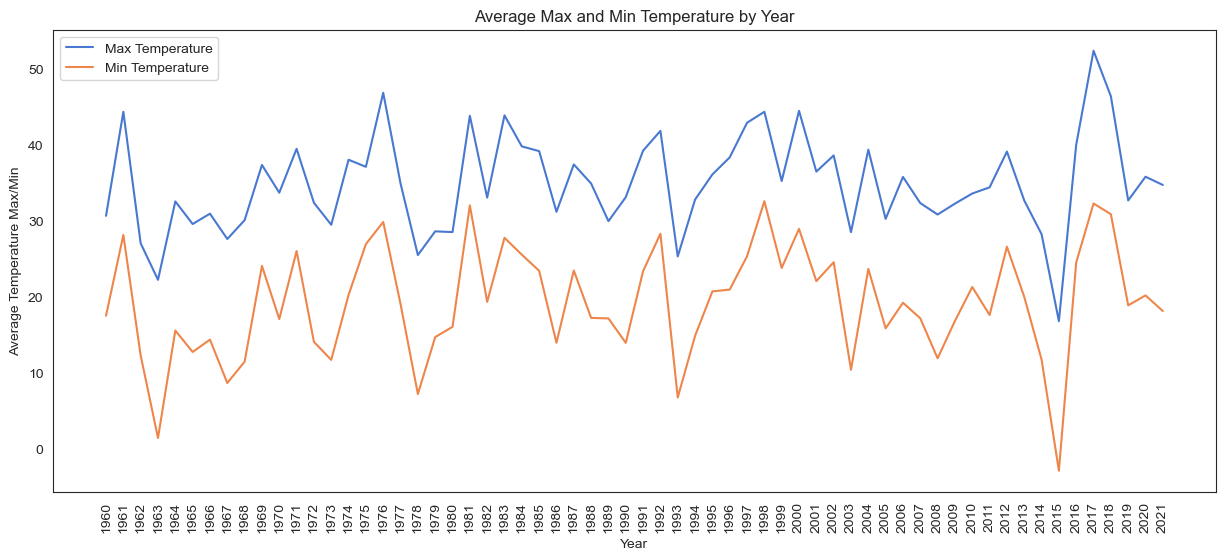

In [33]:
plt.figure(figsize=(15,6))

# Create a line plot
plt.plot(temperature_time.index, temperature_time.values, label=['Max Temperature', 'Min Temperature'])

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Average Temperature Max/Min')
plt.title('Average Max and Min Temperature by Year')

plt.xticks(temperature_time.index, rotation=90)

# Display the plot
plt.legend()
plt.show()


In [34]:
app_temp_time = new_df.groupby('year')[['apparent_temperature_max','apparent_temperature_min']].mean()
app_temp_time

,apparent_temperature_max,apparent_temperature_min
year,,
1960,21.446667,7.940000
1961,37.646667,19.706667
1962,17.740000,2.673333
1963,12.793333,-8.713333
1964,23.020000,6.180000
...,...,...
2017,46.426667,23.686667
2018,39.506667,22.520000
2019,24.506667,9.220000


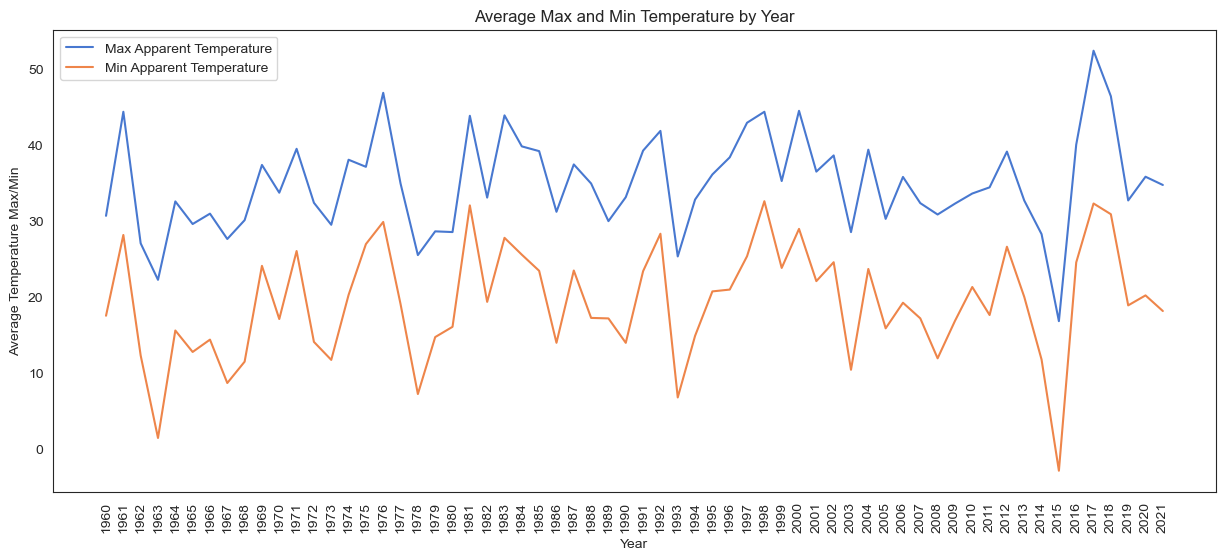

In [36]:
plt.figure(figsize=(15,6))

# Create a line plot
plt.plot(temperature_time.index, temperature_time.values, label=['Max Apparent Temperature', 'Min Apparent Temperature'])

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Average Temperature Max/Min')
plt.title('Average Max and Min Temperature by Year')

plt.xticks(temperature_time.index, rotation=90)

# Display the plot
plt.legend()
plt.show()


## ANALYSIS

###  Based on the graphs above, we can see that over time, there has been a slight increase in Max and Min average apparent and 2M temperatures. We can also see that over the years that precipitation has slowly been increasing in general since 1960 for the 15 day range of my birthday (02/23/1995). From the temperature models, you can see that every 10 years or so, there seems to be a major valley in temperatures, showing a slight repeatable/predicatble pattern. This is a slight inverse relationship with precipitation which shows that just because it is colder, does not result in more snow/precipitation. 